# modélisation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as plt
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
scaled_df=pd.read_csv("C:/Users/Imen/Desktop/projet immobilier/scaled_df.csv")
train_df=pd.read_csv("C:/Users/Imen/Desktop/projet immobilier/train_df.csv")
test_df=pd.read_csv("C:/Users/Imen/Desktop/projet immobilier/test_df.csv")
test_scaled_df=pd.read_csv("C:/Users/Imen/Desktop/projet immobilier/test_scaled_df.csv")

In [3]:
scaled_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.825666,-0.515089,-0.608996,-0.726655,-0.621558,0.408724,0.111969,0.0
1,1.223223,-0.394578,-0.485628,-0.608980,-0.496636,0.103359,-0.482785,0.0
2,-0.605540,0.576784,0.109859,0.139866,0.224271,2.008902,1.137529,1.0
3,-0.048960,-0.809772,-0.824890,-1.029403,-0.879211,-1.631203,-1.084516,0.0
4,1.859314,-0.381845,-0.485628,-0.526607,-0.486226,-0.615347,-0.562144,0.0
...,...,...,...,...,...,...,...,...
11553,-0.764563,-0.473251,-0.573409,-0.209952,-0.566905,0.013734,-0.917950,0.0
11554,-1.957235,-0.220406,0.102742,-0.336186,-0.153099,-0.380402,-0.761849,1.0
11555,-0.207983,0.159316,0.005471,0.570988,0.047297,0.667409,0.060517,1.0
11556,1.064200,-0.179478,-0.037233,-0.040926,-0.043792,-1.213967,-1.230153,1.0


# 1 er essai de régression linéaire

In [4]:
#définir x_train,y_train, x_test,y_test
X_train=scaled_df.drop(['median_house_value','ocean_proximity'], axis=1)
Y_train=scaled_df['median_house_value']
X_test=test_scaled_df.drop(['median_house_value'], axis=1)
Y_test=test_scaled_df['median_house_value']

In [5]:
X_train

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.825666,-0.515089,-0.608996,-0.726655,-0.621558,0.408724
1,1.223223,-0.394578,-0.485628,-0.608980,-0.496636,0.103359
2,-0.605540,0.576784,0.109859,0.139866,0.224271,2.008902
3,-0.048960,-0.809772,-0.824890,-1.029403,-0.879211,-1.631203
4,1.859314,-0.381845,-0.485628,-0.526607,-0.486226,-0.615347
...,...,...,...,...,...,...
11553,-0.764563,-0.473251,-0.573409,-0.209952,-0.566905,0.013734
11554,-1.957235,-0.220406,0.102742,-0.336186,-0.153099,-0.380402
11555,-0.207983,0.159316,0.005471,0.570988,0.047297,0.667409
11556,1.064200,-0.179478,-0.037233,-0.040926,-0.043792,-1.213967


In [6]:
X_test

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.945885,0.643383,0.095121,0.637892,0.206080,1.554603
1,-0.678598,-0.548359,-0.646003,-0.584371,-0.613430,-0.293435
2,0.826305,0.109894,-0.048398,-0.051837,-0.029174,0.237244
3,-0.916215,1.124999,0.692725,1.897582,0.818773,1.069899
4,-0.995420,-0.245169,-0.206034,-0.466743,-0.230819,0.872803
...,...,...,...,...,...,...
4949,-0.282571,2.444636,1.709123,2.367025,1.891633,1.171267
4950,0.430278,-0.283179,-0.297792,0.108565,-0.202382,-0.967413
4951,-0.520187,-0.057352,-0.130745,-0.123483,-0.098974,-0.895099
4952,1.697565,-0.836792,-0.808344,-0.848500,-0.861609,-0.872218


In [7]:
#on test sur la partie train avant la standardisation
from sklearn import linear_model
#Initialize the linear regression model
reg = linear_model.LinearRegression()
#Train our model with the training data
reg.fit(X_train, Y_train)
#Print the coefecients/weights for each feature/column of our model
print(reg.coef_)
#print our price predictions on our test data
y_pred = reg.predict(X_test)
print(y_pred)
reg.score(X_test,Y_test)

[ 0.1965773  -0.47052163  0.32513    -0.27066942  0.46378848  0.79669987]
[ 0.50715547 -0.44552729  0.28450164 ... -0.84338588 -0.40022281
  0.14724762]


0.5488558470133748

In [8]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, Y_test)

0.4474438829879897

In [9]:
#on à utilisé une regression linéaire simple sur la partie entrainement et on à eu 0.63contre la prediction avec les valeur standardiser
#ou on à eu une prédiction plus bas sachant qu on a pris la mediane comme y et les rest de la data comme un x

In [10]:
from sklearn import linear_model
#definir x et y
x=train_df.drop('median_house_value',axis=1)
y=train_df['median_house_value']
#instancier modèle
#Initialize the linear regression model
reg = linear_model.LinearRegression()
#Train our model with the training data
reg.fit(x,y)
#Print the coefecients/weights for each feature/column of our model
print(reg.coef_)
#print our price predictions on our test data
y_pred = reg.predict(x)
print(y_pred)
reg.score(x,y)

[-4.22624767e+04 -4.18030331e+04  1.03474909e+03 -1.34450083e+01
  9.75074101e+01 -3.61018781e+01  6.63056262e+01  4.12196677e+04
  3.40143936e+02]
[245515.05018051 250539.52475958 393284.41658961 ... 254171.92314082
  92758.72553764 225359.65996522]


0.6340406798371199

In [11]:
from sklearn.linear_model import LinearRegression
#on va changer le X
x=scaled_df[['median_income']]
y=scaled_df[['median_house_value']]
#instancier modèle
model_linReg = LinearRegression()
#entrainement du modèle
model_linReg.fit(x, y)
#précision du modèle
precision = model_linReg.score(x, y)
print(precision)
#prédiction
prediction = model_linReg.predict(x)
print(prediction)

0.472730657568075
[[ 0.28101972]
 [ 0.07106486]
 [ 1.38122868]
 ...
 [ 0.45887981]
 [-0.8346681 ]
 [-0.13753285]]


In [12]:
from sklearn.linear_model import LinearRegression
#on va changer le X
x=train_df[['median_income']]
y=train_df[['median_house_value']]
#instancier modèle
model_linReg = LinearRegression()
#entrainement du modèle
model_linReg.fit(x, y)
#précision du modèle
precision = model_linReg.score(x, y)
print(precision)
#prédiction
prediction = model_linReg.predict(x)
print(prediction)

0.47273065756807486
[[238384.85583935]
 [214309.51170178]
 [364544.87460352]
 ...
 [258779.91938285]
 [110449.89032009]
 [190389.79085791]]


In [13]:
#on va  tester une régression linéaire simple sur la partie test 

# 2 eme essai de modéle

In [14]:
#random forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, Y_train)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [15]:
y_pred = regressor.predict(X_test)
y_pred

array([ 0.72451955, -0.72220707,  0.26843084, ..., -1.15209691,
       -0.77463268, -0.18482535])

In [16]:
regressor.score(X_test,Y_test)

0.8434151661668262

In [17]:
df=pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,0.687440,0.724520
1,-0.855528,-0.722207
2,0.384047,0.268431
3,0.237552,0.634875
4,0.148268,0.199896
...,...,...
4949,0.501937,0.624656
4950,-1.223066,-0.881251
4951,-1.154586,-1.152097
4952,-1.281144,-0.774633


In [18]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.2576302449471609
Mean Squared Error: 0.15530053000470015
Root Mean Squared Error: 0.3940818823603797


In [19]:
import pickle

with open("regressor.pkl", "wb") as file:
    pickle.dump(regressor, file)

In [20]:
# Calculate the absolute errors
errors = abs(y_pred - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.26 degrees.
Accuracy: 93.81 %.


C:\Users\Imen\anaconda31\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Imen\anaconda31\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


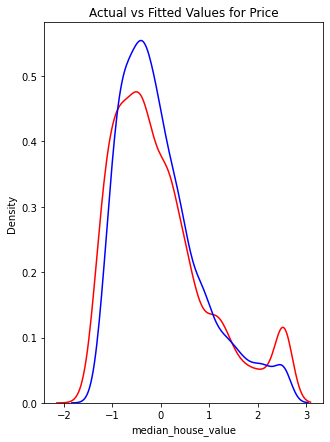

In [21]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

# 3eme modéle

In [22]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.02,34.11,39.0,1504.0,280.0,718.0,261.0,4.6250,219000.0,1
1,-122.33,37.94,44.0,1769.0,332.0,828.0,309.0,4.0526,150800.0,3
2,-121.70,36.55,21.0,3905.0,583.0,1528.0,586.0,7.6245,336600.0,0
3,-122.19,37.75,28.0,856.0,189.0,435.0,162.0,0.8012,81800.0,3
4,-117.38,33.99,52.0,1797.0,332.0,905.0,313.0,2.7054,141700.0,1
...,...,...,...,...,...,...,...,...,...,...
11553,-116.21,33.66,19.0,1596.0,295.0,1201.0,282.0,3.8846,100900.0,1
11554,-117.57,34.07,4.0,2152.0,580.0,1083.0,441.0,3.1458,118800.0,1
11555,-121.81,37.37,26.0,2987.0,539.0,1931.0,518.0,5.1099,213100.0,0
11556,-119.61,36.57,42.0,2242.0,521.0,1359.0,483.0,1.5833,65100.0,1


In [23]:
from sklearn.preprocessing import StandardScaler
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']
# Separating out the features
x = train_df.loc[:, features].values
# Separating out the target
y = train_df.loc[:,['median_house_value']].values
# Standardizing the features
x = StandardScaler().fit_transform(X_train)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
x_new=pca.fit(X_train)
print("Pourcentage de variance expliquée : ")
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
print("Composantes principales : ")
print(pca.components_)

Pourcentage de variance expliquée : 
[0.6373491  0.17768592 0.13530044 0.03531132 0.01044983]
0.9960966193879056
Composantes principales : 
[[-0.2269912   0.48805068  0.49510253  0.4644699   0.49768041  0.04167657]
 [-0.36808422  0.09482219 -0.11672363 -0.1190751  -0.10925788  0.90320661]
 [ 0.90056375  0.13369509  0.08626533  0.04973848  0.11519155  0.38461128]
 [-0.01162489  0.36076099  0.32248898 -0.85962934  0.13061029 -0.09846612]
 [-0.04033714 -0.77004008  0.36602179 -0.12973702  0.48090284  0.15277434]]


# Tuning des hyperparamètres

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

In [26]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1
                           )
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             scoring='r2', verbose=1)

In [27]:
grid_search.best_params_

{'max_features': 0.5000000000000001, 'n_estimators': 95}

In [28]:
grid_search.best_score_

0.6640871866277526

In [29]:
#random forest
from sklearn.ensemble import RandomForestRegressor
regressor_modif = RandomForestRegressor(n_estimators = 95, random_state = 0)
regressor_modif.fit(X_train,Y_train)
regressor_modif

RandomForestRegressor(n_estimators=95, random_state=0)

In [30]:
y_pred = regressor_modif.predict(X_test)
y_pred

array([ 0.73877043, -0.66892255,  0.33380671, ..., -1.15445674,
       -0.73510839, -0.19858081])

# features selection

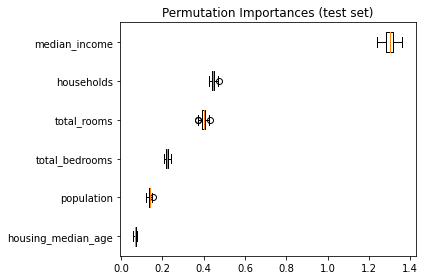

In [31]:
from sklearn.inspection import permutation_importance
# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, Y_train)

# Evaluate the model with the test set
model.score(X_test, Y_test)
permutation_score = permutation_importance(model, 
                                           X_test, Y_test,

                                           random_state=3,
                                           n_repeats=100) 

# Unstack results
importance_df = pd.DataFrame(np.vstack((X_train.columns,
                                        permutation_score.importances_mean)).T) 

importance_df.columns=['feature','feature importance']

# Order by importance
importance_df.sort_values(by="feature importance", ascending = False)
sorted_idx = permutation_score.importances_mean.argsort()

fig, ax = plt.subplots() 
ax.boxplot(permutation_score.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx]) 
ax.set_title("Permutation Importances (test set)") 
fig.tight_layout() 
plt.show()

In [32]:
importance_df

,feature,feature importance
0,housing_median_age,0.067813
1,total_rooms,0.400275
2,total_bedrooms,0.223775
3,population,0.13786
4,households,0.44569
5,median_income,1.301289


# Tester une regression linéaire simple avec les nouveaux features

In [36]:
X1_train=scaled_df[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
y1_train=scaled_df['median_house_value']


In [37]:
X1_test=test_scaled_df[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
Y1_test=test_scaled_df['median_house_value']

In [38]:
import pickle
my_model = pickle.load(open("regressor.pkl","rb"))

my_model.score(X1_test, Y1_test),

(0.8434151661668262,)